### ***Research Methods project- Unemployment analysis - IMBA Year 2**

*   Georgescu Sunita-Maria
*   Nistor Amelia

*   Vuc Daria








The project anaysis the unemployment in Romania between the years 1992 to 2022.


Our Dependent variable (y) is Unemployment rate .

Our independent variables (x) are

1.   Foreign direct investment

1.   Interest rate

1.   Government Expenditure
2.   Population Growth














**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

**Import Dataset**

In [ ]:
data_df=pd.read_csv('/content/drive/MyDrive/UnemploymentandVariablesDatasetFinal.csv')

In [ ]:
data_df.head()

,Foreign direct investment,Government Expenditure,Interest rate,Population Growth,Unemployment rate
0,0.306508,3587916667,211.205588,-0.903463,8.260
1,0.356585,3253996448,255.166862,-0.136109,8.373
2,1.133915,4139835296,136.759393,-0.145379,8.170
3,1.119418,4584710419,32.242485,-0.202319,8.010
4,0.712022,4311709374,38.829301,-0.288129,6.740


**Correlation index**

In [ ]:
corrolation_list = ['Foreign direct investment', 'Government Expenditure','Interest rate','Population Growth','Unemployment rate']
up_data = data_df[corrolation_list].corr()
display(up_data)

,Foreign direct investment,Government Expenditure,Interest rate,Population Growth,Unemployment rate
Foreign direct investment,1.000000,0.128906,-0.363938,-0.279338,-0.145553
Government Expenditure,0.128906,1.000000,-0.564051,-0.136761,-0.673612
Interest rate,-0.363938,-0.564051,1.000000,0.235475,0.408903
Population Growth,-0.279338,-0.136761,0.235475,1.000000,-0.007826
Unemployment rate,-0.145553,-0.673612,0.408903,-0.007826,1.000000


**Correlation Heatmap Display**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

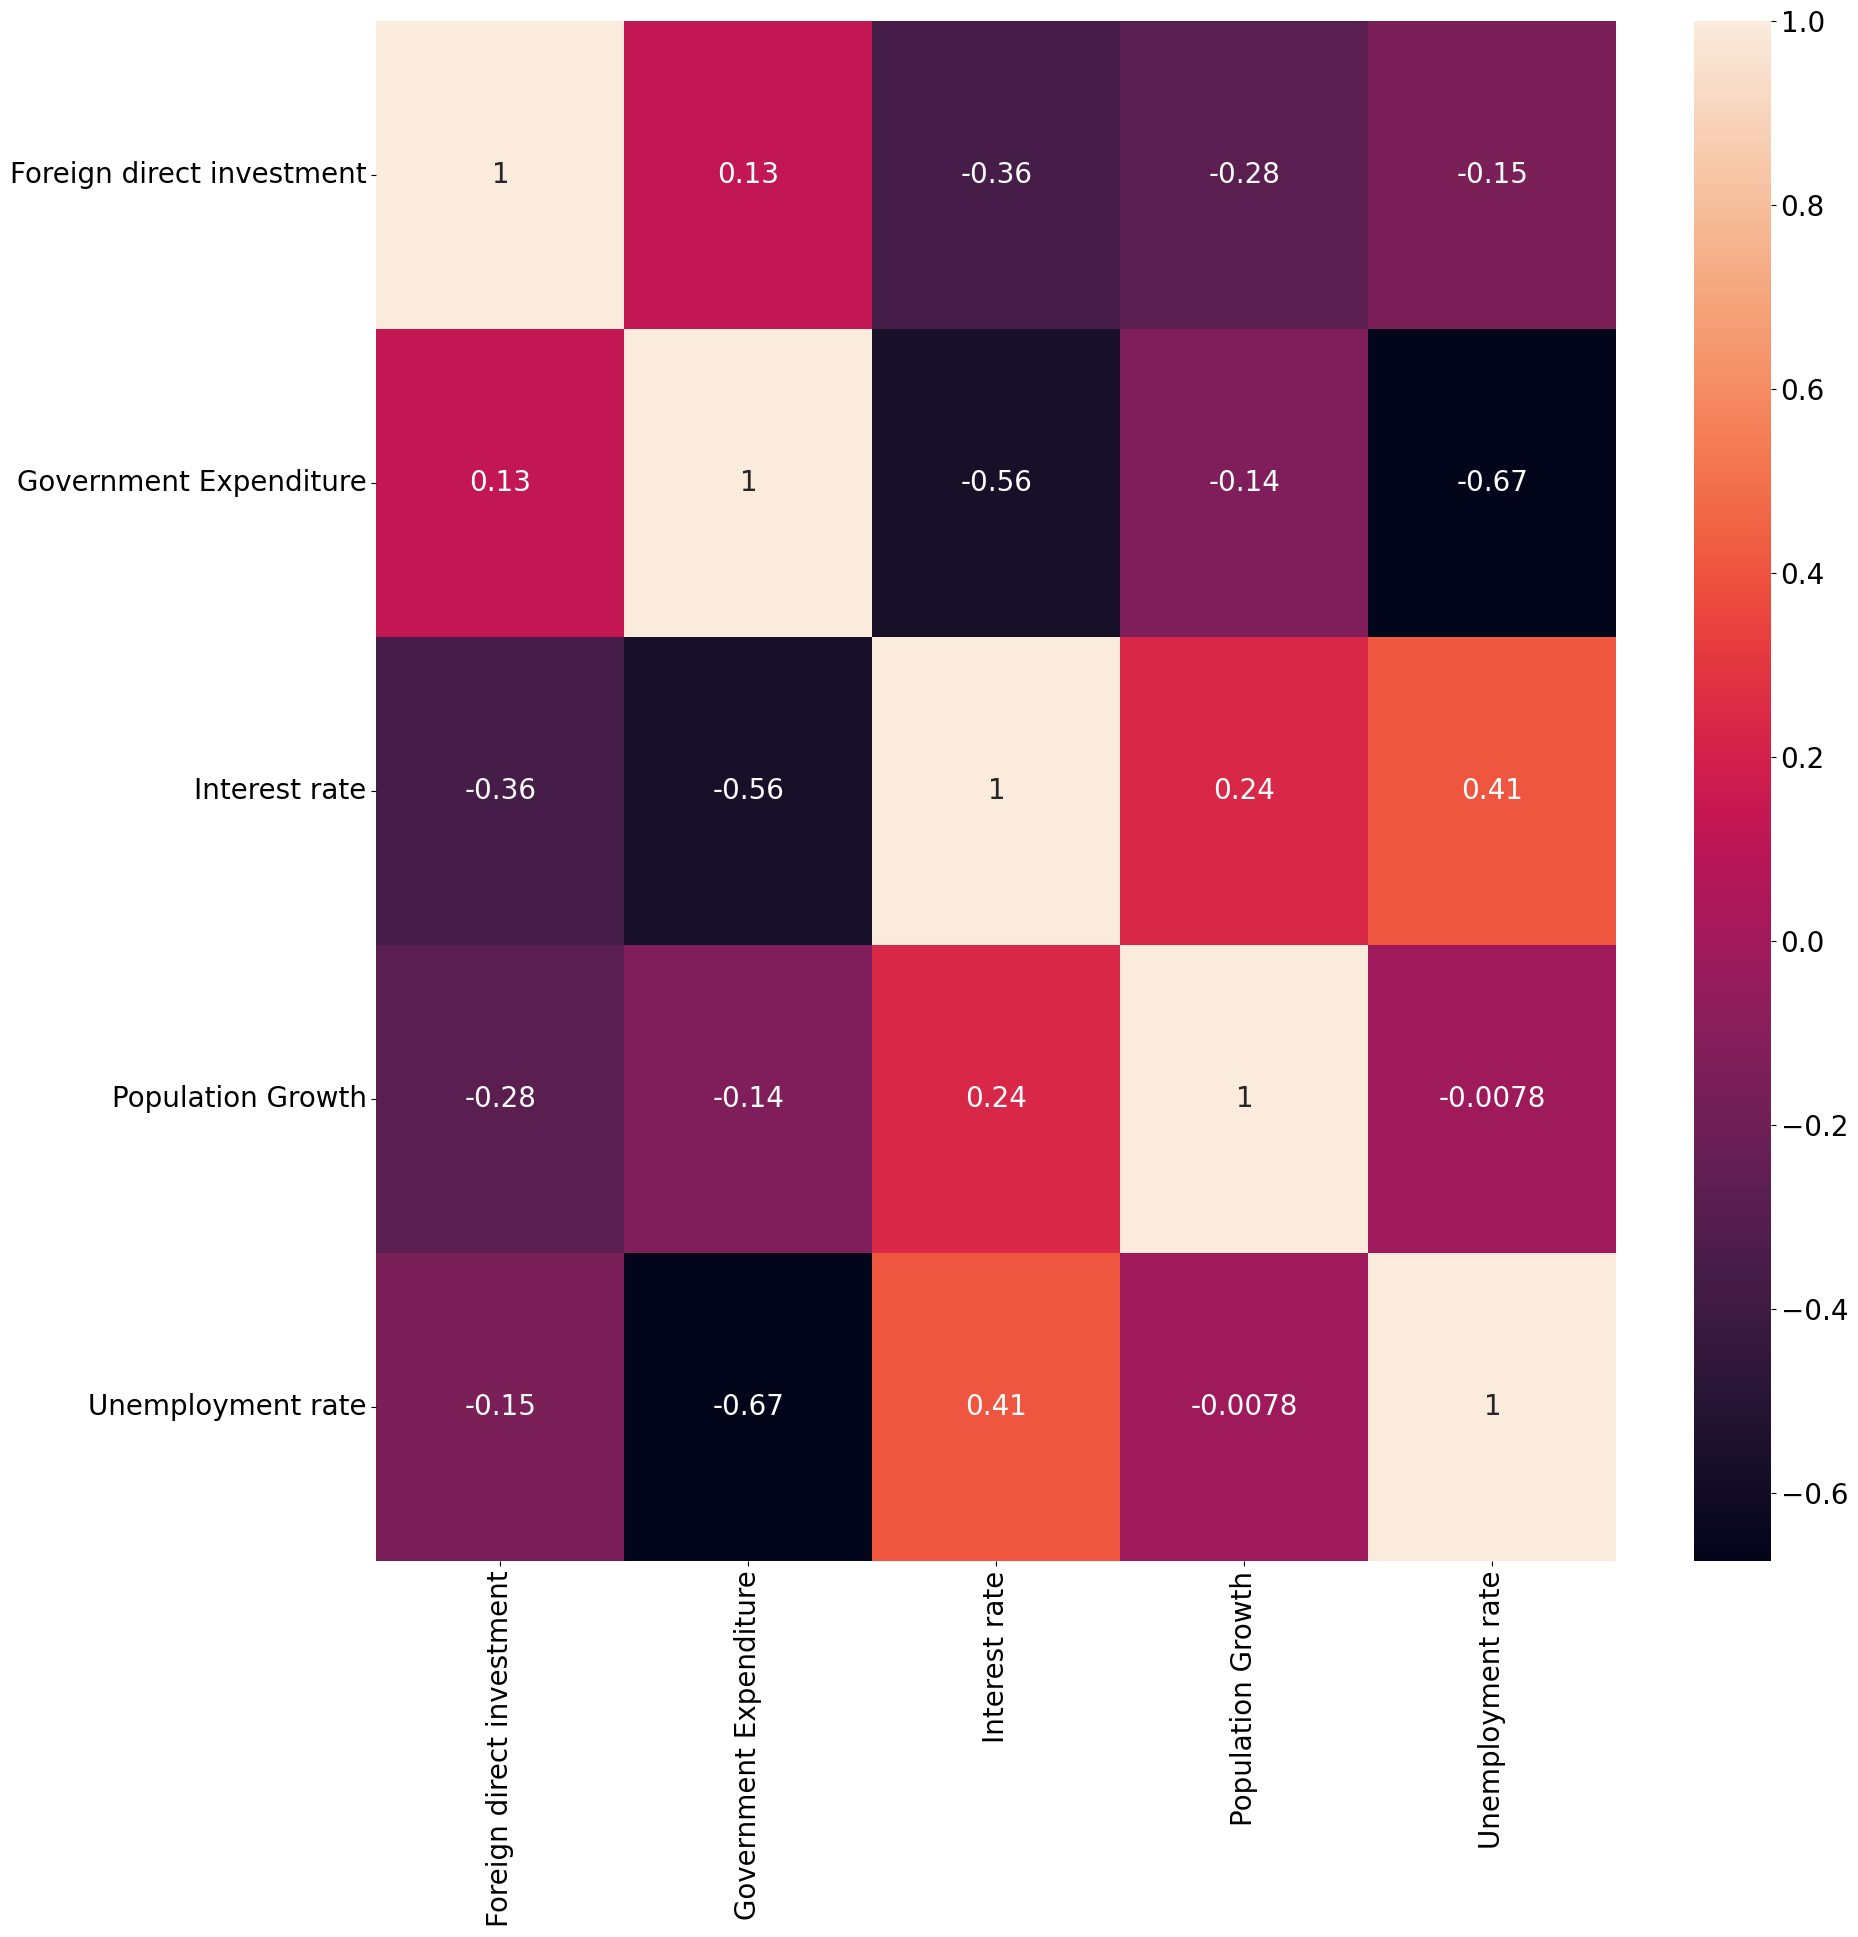

In [ ]:
# to help you visualize these correlations, see the plots below
# the lighter the colour the higher the correlation

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,20))
sns.heatmap(up_data, annot=True);

This is the pearson correlation values: 1 = a strong positive correlation 0 = no correlation -1 = strong negative correlation.

**Multiple regression: Define X and Y**

In [ ]:
x=data_df.drop(['Unemployment rate'], axis=1).values
y=data_df ['Unemployment rate'].values

In [ ]:
print(x)

[[ 3.06508326e-01  3.58791667e+09  2.11205588e+02 -9.03462928e-01]
 [ 3.56585212e-01  3.25399645e+09  2.55166862e+02 -1.36109142e-01]
 [ 1.13391484e+00  4.13983530e+09  1.36759393e+02 -1.45379065e-01]
 [ 1.11941808e+00  4.58471042e+09  3.22424847e+01 -2.02318796e-01]
 [ 7.12021743e-01  4.31170937e+09  3.88293013e+01 -2.88129486e-01]
 [ 3.41529919e+00  4.51510476e+09  1.54763480e+02 -2.87897952e-01]
 [ 4.87096009e+00  4.95877452e+09  5.90965828e+01 -2.06980242e-01]
 [ 2.89543421e+00  6.01082383e+09  4.58037811e+01 -1.56978616e-01]
 [ 2.78361317e+00  6.28060982e+09  4.56665940e+01 -1.29440040e-01]
 [ 2.86420760e+00  6.38110664e+09  3.44770124e+01 -1.39542999e+00]
 [ 2.48342020e+00  6.82889316e+09  2.25398863e+01 -1.83065499e+00]
 [ 3.18995908e+00  9.27492020e+09  1.52734890e+01 -7.21262297e-01]
 [ 8.59368513e+00  1.10418160e+10  1.18743636e+01 -5.69786273e-01]
 [ 6.60067176e+00  1.59889664e+10  9.01491283e+00 -6.17530957e-01]
 [ 9.02006052e+00  1.94301639e+10  6.55851412e+00 -5.92402560e

In [ ]:
print(y)

[8.26  8.373 8.17  8.01  6.74  5.52  5.63  6.24  6.97  6.56  8.11  6.95
 7.72  7.17  7.27  6.41  5.79  6.86  6.96  7.18  6.79  7.1   6.8   6.81
 5.9   4.93  4.19  3.91  5.03  5.59  5.436]


**Split the dataset in training set and test set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

**Train the model on the training set**

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

**Predict the test set results**

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[7.28107814 5.27836863 6.55628869 7.26529439 5.55475737 5.99108793
 6.15337027 6.95343103 6.24221816 6.31009248]


In [ ]:
ml.predict([[ 0.306508 ,3587916667	,211.205588, -0.903463]])

array([7.55093803])

**Evaluate the model**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.580280325753812

**Plot the results**

Text(0.5, 1.0, 'Actual vs. Predicted')

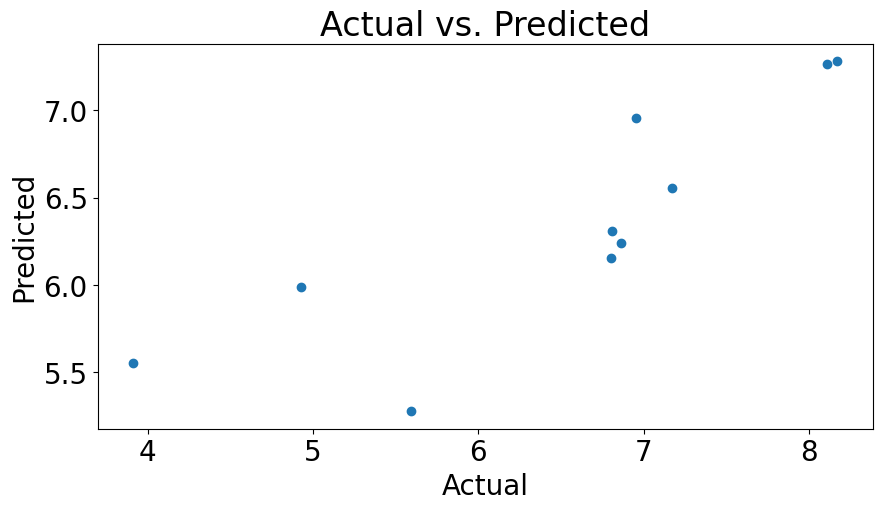

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

**Predicted values**

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference': y_test-y_pred})
pred_y_df[0:30]

,Actual Value,Predicted value,Difference
0,8.17,7.281078,0.888922
1,5.59,5.278369,0.311631
2,7.17,6.556289,0.613711
3,8.11,7.265294,0.844706
4,3.91,5.554757,-1.644757
5,4.93,5.991088,-1.061088
6,6.80,6.153370,0.646630
7,6.95,6.953431,-0.003431
8,6.86,6.242218,0.617782
9,6.81,6.310092,0.499908
